# import keras
from keras.callbacks import EarlyStopping
imdb = keras.datasets.imdb
VOCAB_SIZE = 10000
INDEX_FROM =2
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words = VOCAB_SIZE, index_from=INDEX_FROM)

In [0]:
'''SANITY'''
print('Sample review: {}'.format(train_data[0]))
print('Sample label: {}'.format(test_labels[1]))

Sample review: [1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]
Sample label: 1


In [0]:
from keras.preprocessing.sequence import pad_sequences
MAXIMUM_LENGTH = 500
preprocessed_train_data = pad_sequences(train_data, maxlen=MAXIMUM_LENGTH)
preprocessed_test_data = pad_sequences(test_data, maxlen=MAXIMUM_LENGTH)

In [0]:
'''SANITY'''
print('Length of sample train_data before preprocessing:', len(train_data[0]))
print('Length of sample train_data after preprocessing:', len(preprocessed_train_data[0]))

Length of sample train_data before preprocessing: 218
Length of sample train_data after preprocessing: 500


In [0]:
from keras.layers import Input, Embedding, LSTM, Dense
import keras
EMBEDDING_SIZE=100
input_1 = Input((500,), dtype='float', name = 'InputLayer')
Embedding_Layer=Embedding(VOCAB_SIZE,EMBEDDING_SIZE)(input_1)
LSTM_Layer = LSTM(100)(Embedding_Layer)
Output_layer = Dense(1, activation= 'sigmoid')(LSTM_Layer)
model = keras.Model(inputs=input_1, output=Output_layer)
model.compile(loss = 'binary_crossentropy', metrics =['accuracy'], optimizer='adam' )
model.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("In..., outputs=Tensor("de...)`
  


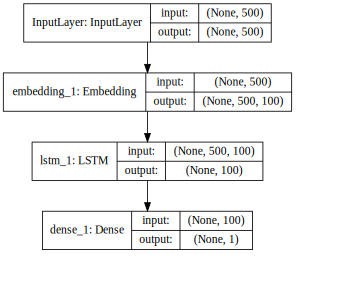

In [0]:
from keras.utils import plot_model 
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))

In [0]:
x_train = preprocessed_train_data[:23000]
x_train_val = preprocessed_train_data[23000:]
y_train = train_labels[:23000]
y_train_val = train_labels[23000:]
#cb = EarlyStopping(monitor='val_acc', mode='auto', patience=5)
history = model.fit(x_train, y_train, batch_size = 100, epochs=3, validation_data = (x_train_val, y_train_val))




Train on 23000 samples, validate on 2000 samples
Epoch 1/3





23000/23000 [==============================] - 221s 10ms/step - loss: 0.5205 - acc: 0.7399 - val_loss: 0.5369 - val_acc: 0.7195
Epoch 2/3
23000/23000 [==============================] - 219s 10ms/step - loss: 0.3425 - acc: 0.8534 - val_loss: 0.4793 - val_acc: 0.7615
Epoch 3/3
23000/23000 [==============================] - 219s 10ms/step - loss: 0.2308 - acc: 0.9121 - val_loss: 0.3242 - val_acc: 0.8660


In [0]:
preprocessed_test_data = pad_sequences(test_data, MAXIMUM_LENGTH)
results = model.evaluate(preprocessed_test_data, test_labels)
print('Test Loss: {}, Test Accuracy: {}'.format(results[0], results[1]))

25000/25000 [==============================] - 278s 11ms/step
Test Loss: 0.3228259552764893, Test Accuracy: 0.86784


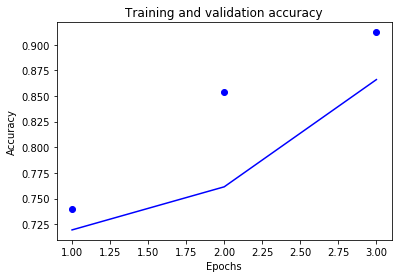

In [0]:
import matplotlib.pyplot as plt
history_dict=history.history
acc =history_dict['acc']
val_acc =history_dict['val_acc']
loss = history_dict['loss']
val_loss =history_dict['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [0]:
'''sanity check'''
embedding = model.get_layer('embedding_1').get_weights()[0]
print('Shape of word_embeddings', embedding.shape)

Shape of word_embeddings (10000, 100)


In [0]:
word2idx = imdb.get_word_index()
word2idx = {k:(v+INDEX_FROM) for k,v in word2idx.items() if v < 10000}
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] = 2
idx2word = dict([(value, key) for (key, value) in word2idx.items()])
print(' '.join(idx2word[idx] for idx in train_data[0]))

1646592/1641221 [==============================] - 1s 0us/step
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole fi

In [0]:
print(train_data[0])

[1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64, 457, 4467, 65, 3940, 3, 172, 35, 255, 4, 24, 99, 42, 837, 111, 49, 669, 2, 8, 34, 479, 283, 4, 149, 3, 171, 111, 166, 2, 335, 384, 38, 3, 171, 4535, 1110, 16, 545, 37, 12, 446, 3, 191, 49, 15, 5, 146, 2024, 18, 13, 21, 3, 1919, 4612, 468, 3, 21, 70, 86, 11, 15, 42, 529, 37, 75, 14, 12, 1246, 3, 21, 16, 514, 16, 11, 15, 625, 17, 2, 4, 61, 385, 11, 7, 315, 7, 105, 4, 3, 2222, 5243, 15, 479, 65, 3784, 32, 3, 129, 11, 15, 37, 618, 4, 24, 123, 50, 35, 134, 47, 24, 1414, 32, 5, 21, 11, 214, 27, 76, 51, 4, 13, 406, 15, 81, 2, 7, 3, 106, 116, 5951, 14, 255, 3, 2, 6, 3765, 4, 722, 35, 70, 42, 529, 475, 25, 399, 316, 45, 6, 3, 2, 1028, 12, 103, 87, 3, 380, 14, 296, 97, 31, 2070, 55, 25, 140, 5, 193, 7485, 17, 3, 225, 21, 20, 133, 475, 25, 479, 4, 143, 29, 5534, 17, 50, 35, 27, 223, 91, 24, 103, 3, 225, 64, 15, 37, 1333, 87, 11, 15, 282, 4, 15, 4471, 112, 102, 31, 14, 15, 5344, 18, 177, 31]


In [0]:
from pandas import DataFrame

print(DataFrame(embedding, index=list(idx2word.values())[2:]).head(10))
print('Shape of embedding:', embedding.shape)

                   0         1         2   ...        97        98        99
woody        0.035299 -0.042817  0.043403  ...  0.065055  0.032356 -0.048318
arranged     0.015308 -0.055294  0.064290  ...  0.039551  0.035570 -0.053082
bringing    -0.000801  0.023394 -0.003262  ...  0.011711  0.017733  0.015213
wooden      -0.041316  0.002127 -0.039710  ... -0.036735  0.006695  0.009491
errors      -0.011394 -0.033568 -0.011731  ... -0.024710  0.042593 -0.022483
dialogs     -0.019464  0.022224  0.013989  ...  0.022640  0.011196  0.022390
kids        -0.014701  0.048014  0.006929  ... -0.040194  0.038370  0.000238
uplifting   -0.020246  0.004425  0.023220  ... -0.038134  0.020601 -0.011510
controversy -0.039826 -0.040335 -0.021308  ... -0.036421  0.004315 -0.000991
projection   0.062749  0.015095  0.011629  ...  0.031551  0.042367  0.058897

[10 rows x 100 columns]
Shape of embedding: (10000, 100)


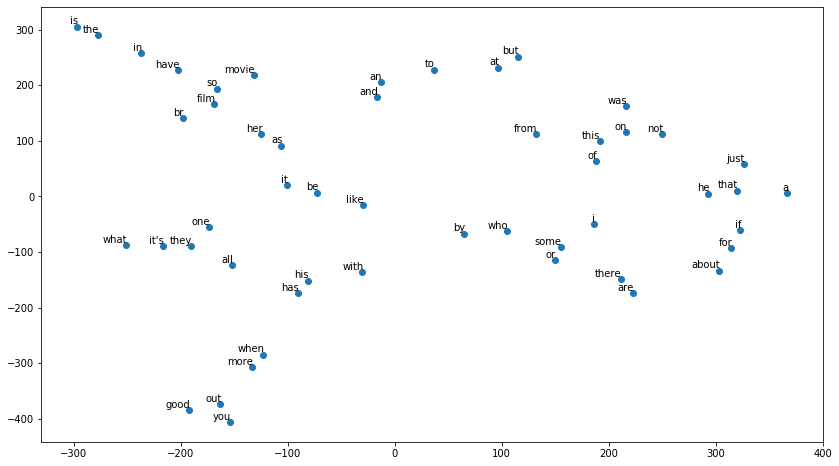

In [0]:
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
import numpy as np

tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=15000, method='exact') 
np.set_printoptions(suppress=True)
start = 3
plot_only = 54
T = tsne.fit_transform(embedding[start:plot_only, :]) 
labels = [idx2word[i] for i in range(start, plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
  plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right',va='bottom')


### Adding Dropout layers

In [0]:
from keras.layers import Dropout
EMBEDDING_SIZE=100
input_1 = Input((500,), dtype='float', name = 'InputLayer')
Embedding_Layer=Embedding(VOCAB_SIZE,EMBEDDING_SIZE)(input_1)
Dropout_1 = Dropout(0.5)(Embedding_Layer)
LSTM_Layer = LSTM(100)(Dropout_1)
Dropout_2 = Dropout(0.5)(LSTM_Layer)
Output_layer = Dense(1, activation= 'sigmoid')(Dropout_2)
model_dropout = keras.Model(inputs=input_1, output=Output_layer)
model_dropout.compile(loss = 'binary_crossentropy', metrics =['accuracy'], optimizer='adam' )
model_dropout.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      (None, 500)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total par

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("In..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [0]:
history_dropout =model_dropout.fit(x_train, y_train, batch_size = 100, epochs=6, validation_data = (x_train_val, y_train_val))

Train on 23000 samples, validate on 2000 samples
Epoch 1/6
23000/23000 [==============================] - 228s 10ms/step - loss: 0.4985 - acc: 0.7543 - val_loss: 0.3771 - val_acc: 0.8480
Epoch 2/6
23000/23000 [==============================] - 225s 10ms/step - loss: 0.2941 - acc: 0.8821 - val_loss: 0.3061 - val_acc: 0.8780
Epoch 3/6
23000/23000 [==============================] - 229s 10ms/step - loss: 0.2150 - acc: 0.9193 - val_loss: 0.3207 - val_acc: 0.8595
Epoch 4/6
23000/23000 [==============================] - 230s 10ms/step - loss: 0.1872 - acc: 0.9322 - val_loss: 0.3186 - val_acc: 0.8765
Epoch 5/6
23000/23000 [==============================] - 231s 10ms/step - loss: 0.1592 - acc: 0.9430 - val_loss: 0.3636 - val_acc: 0.8730
Epoch 6/6
23000/23000 [==============================] - 229s 10ms/step - loss: 0.1414 - acc: 0.9483 - val_loss: 0.4163 - val_acc: 0.8110


In [0]:
results_d = model_dropout.evaluate(preprocessed_test_data, test_labels)
print('Test Loss: {}, Test Accuracy: {}'.format(results_d[0], results_d[1]))

25000/25000 [==============================] - 292s 12ms/step
Test Loss: 0.41235715335845946, Test Accuracy: 0.81672


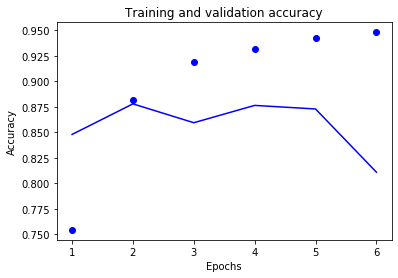

In [0]:
history_dict=history_dropout.history
acc =history_dict['acc']
val_acc =history_dict['val_acc']
loss = history_dict['loss']
val_loss =history_dict['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [0]:
from keras.layers import Bidirectional
input_2 = Input((500,), dtype='float', name = 'InputLayer')
Embedding_Layer2=Embedding(VOCAB_SIZE,EMBEDDING_SIZE)(input_2)
LSTM_Layer2 = Bidirectional(LSTM(100))(Embedding_Layer2)
Output_layer2 = Dense(1, activation= 'sigmoid')(LSTM_Layer2)
model2 = keras.Model(inputs=input_2, output=Output_layer2)
model2.compile(loss = 'binary_crossentropy', metrics =['accuracy'], optimizer='adam' )
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      (None, 500)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 1,161,001
Trainable params: 1,161,001
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("In..., outputs=Tensor("de...)`
  


In [0]:
history2 =model2.fit(x_train, y_train, batch_size = 100, epochs=6, validation_data = (x_train_val, y_train_val))

Train on 23000 samples, validate on 2000 samples
Epoch 1/6
23000/23000 [==============================] - 493s 21ms/step - loss: 0.1465 - acc: 0.9470 - val_loss: 0.3783 - val_acc: 0.8620
Epoch 2/6
23000/23000 [==============================] - 496s 22ms/step - loss: 0.1451 - acc: 0.9466 - val_loss: 0.3740 - val_acc: 0.8720
Epoch 3/6
23000/23000 [==============================] - 493s 21ms/step - loss: 0.1246 - acc: 0.9549 - val_loss: 0.4640 - val_acc: 0.8595
Epoch 4/6
23000/23000 [==============================] - 494s 21ms/step - loss: 0.1580 - acc: 0.9377 - val_loss: 0.4690 - val_acc: 0.8705
Epoch 5/6
23000/23000 [==============================] - 495s 22ms/step - loss: 0.0809 - acc: 0.9730 - val_loss: 0.4733 - val_acc: 0.8660
Epoch 6/6
23000/23000 [==============================] - 500s 22ms/step - loss: 0.2114 - acc: 0.9206 - val_loss: 0.4176 - val_acc: 0.8485


In [0]:
results_b = model_dropout.evaluate(preprocessed_test_data, test_labels)
print('Test Loss: {}, Test Accuracy: {}'.format(results_b[0], results_d[1]))

25000/25000 [==============================] - 293s 12ms/step
Test Loss: 0.41235715335845946, Test Accuracy: 0.81672


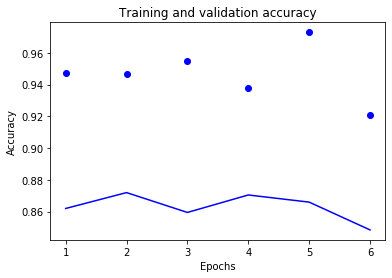

In [0]:
import matplotlib.pyplot as plt
history_dict=history2.history
acc =history_dict['acc']
val_acc =history_dict['val_acc']
loss = history_dict['loss']
val_loss =history_dict['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()